In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [6]:
df.rename(columns ={'v1': 'Nature','v2':'Message'},inplace=True)

In [7]:
df.head()

,Nature,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

In [9]:
df['Nature']=enc.fit_transform(df['Nature'])

## 0= ham
## 1= spam

In [10]:
df.head()

,Nature,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

Nature     0
Message    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep ='first')

In [14]:
df.shape

(5169, 2)

In [15]:
##EDA

In [16]:
ham_spam_ratio=df['Nature'].value_counts()
ham_spam_ratio

0    4516
1     653
Name: Nature, dtype: int64

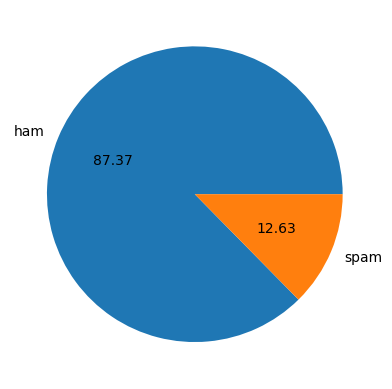

In [17]:
ham_spam_pie_chart=plt.pie(ham_spam_ratio,labels=['ham','spam'],autopct="%0.2f")

In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shahpershahin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
## number of character in each message

df['num_char']=df['Message'].apply(len)

In [22]:
df.head()

,Nature,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
## number of word in each message

df['num_word']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,Nature,Message,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
## number of sentences in each message

df['num_sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,Nature,Message,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#ham messages

df[df['Nature']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#spam messages

df[df['Nature']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


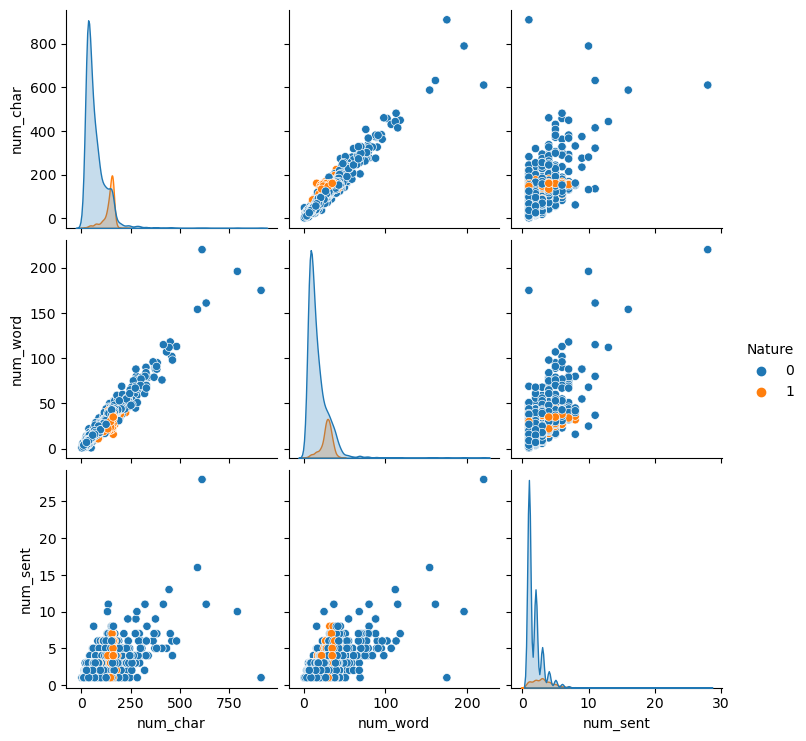

In [30]:
sns.pairplot(df,hue='Nature')

<AxesSubplot:>

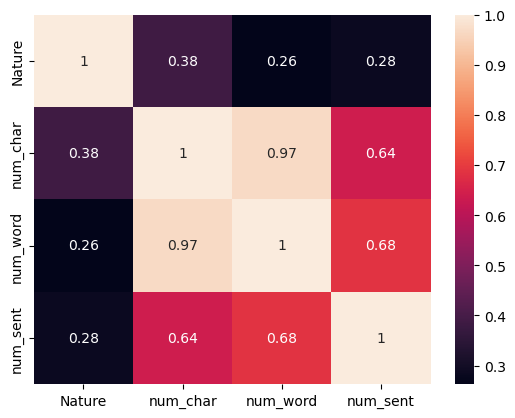

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
## DATA PREPROCESSING

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shahpershahin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
stopwords

<WordListCorpusReader in '/Users/shahpershahin/nltk_data/corpora/stopwords'>

In [36]:
from nltk.stem.porter import PorterStemmer

ps =PorterStemmer()
ps.stem('working')

'work'

In [37]:
def tranform_message(Message):
    Message=Message.lower()
    Message=nltk.word_tokenize(Message)
    
    y=[]
    for i in Message:
        if i.isalnum():
            y.append(i)
    Message=y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Message=y[:]
    y.clear()
    
    for i in Message:
        y.append(ps.stem(i));
        
    
    return " ".join(y)

In [38]:
tranform_message("I love writing code for machine learning.")

'love write code machin learn'

In [39]:
df['transformed_text']=df['Message'].apply(tranform_message)

In [40]:
df.head()

,Nature,Message,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

wc= WordCloud(width=2000,height=2000,min_font_size=10,background_color='white',max_words=10)

In [ ]:
spam_wc=wc.generate(df[df['Nature']==1]['transformed_text'].str.cat( sep=" "))

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['Nature']==0]['transformed_text'].str.cat( sep=" "))

In [ ]:
# Create a figure with a size of 30x10
plt.figure(figsize=(30, 10))

# Plot the ham_wc image
plt.imshow(ham_wc)

In [ ]:
spam_words=[]

for msg in df[df['Nature']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [ ]:
len(spam_words)

In [ ]:
from collections import Counter 
spam_words_df=pd.DataFrame(Counter(spam_words).most_common(30))

In [ ]:
spam_words_df

In [ ]:
spam_words_df.rename(columns={0:'text',1:'quantity'},inplace=True)

In [ ]:
spam_words_df

In [ ]:
sns.barplot(x=spam_words_df['text'],y=spam_words_df['quantity'])
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
ham_words=[]

for msg in df[df['Nature']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_words.append(word)

In [ ]:
from collections import Counter
ham_words_df=pd.DataFrame(Counter(ham_words).most_common(30))

In [ ]:
ham_words_df.rename(columns={0:'text',1:'quantity'},inplace=True)

In [ ]:
ham_words_df

In [ ]:
sns.barplot(x=ham_words_df['text'],y=ham_words_df['quantity'])

plt.xticks(rotation='vertical')
plt.show()